In [77]:
from numpy import random as r
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
import random
import time
from datetime import datetime 
from datetime import timedelta 
from pyspark.sql import SQLContext
from pyspark import SparkConf, SparkContext


sc = SparkContext(conf=SparkConf().setAppName("Random Date Generator").setMaster("local[2]"))
sqlContext=SQLContext(sc)

random.random()

0.8970458252163757

In [3]:
def current_tomorrow():
    
    start = datetime.now().strftime('%m/%d/%Y %I:%M %p')
    end = (datetime.now() + timedelta(days=1))  
    end =  end.strftime('%m/%d/%Y %I:%M %p')
    
    hour_gen = -1
    format = '%m/%d/%Y %I:%M %p'
    
    date = time.strptime("1/1/2000 1:00 AM", format)
    date = datetime.fromtimestamp(time.mktime(date))
    
    while((date<datetime.now()) or (date> (datetime.now() + timedelta(days=1)))):
    
        while(0>hour_gen or hour_gen>23):
            hour_gen = r.poisson(lam=2, size=1)

        stime = time.mktime(time.strptime(str(start), format))
        etime = time.mktime(time.strptime(str(end), format))

        ptime = stime + random.random() * (etime - stime)

        random_time = time.strftime(format, time.localtime(ptime))
        date = datetime.strptime(random_time,format).replace(hour = hour_gen)

    return str(date)


print(current_tomorrow())


2020-08-18 00:53:00


In [4]:
def current_week():
    start = datetime.now().strftime('%m/%d/%Y %I:%M %p')
    end = (datetime.now() + timedelta(weeks=1))  
    end =  end.strftime('%m/%d/%Y %I:%M %p')
    
    format = '%m/%d/%Y %I:%M %p'
    
    date = time.strptime("1/1/2000 1:00 AM", format)
    date = datetime.fromtimestamp(time.mktime(date))
    
    while((date<datetime.now()) or (date> (datetime.now() + timedelta(weeks=1)))):
    
        print(type(date))

        hour_gen = -1

        while(0>hour_gen or hour_gen>23):
            hour_gen = r.poisson(lam=2, size=1)


        stime = time.mktime(time.strptime(str(start), format))
        etime = time.mktime(time.strptime(str(end), format))

        ptime = stime + random.random() * (etime - stime)

        random_time = time.strftime(format, time.localtime(ptime))
        date = datetime.strptime(random_time,format).replace(hour = hour_gen)

    return str(date)

In [5]:
print(current_week())

<class 'datetime.datetime'>
2020-08-21 04:37:00


In [6]:
def current_month():
    start = datetime.now().strftime('%m/%d/%Y %I:%M %p')
    end = (datetime.now() + timedelta(weeks=4))  
    end =  end.strftime('%m/%d/%Y %I:%M %p')
    
    hour_gen = -1
    
    format = '%m/%d/%Y %I:%M %p'
    
    date = time.strptime("1/1/2000 1:00 AM", format)
    date = datetime.fromtimestamp(time.mktime(date))
    
    while((date<datetime.now()) or (date> (datetime.now() + timedelta(weeks=4)))):
    
        while(0>hour_gen or hour_gen>23):
            hour_gen = r.poisson(lam=2, size=1)


        stime = time.mktime(time.strptime(str(start), format))
        etime = time.mktime(time.strptime(str(end), format))

        ptime = stime + random.random() * (etime - stime)

        random_time = time.strftime(format, time.localtime(ptime))
        date = datetime.strptime(random_time,format).replace(hour = hour_gen)

    return str(date)

In [7]:
print(current_month())

2020-08-24 01:23:00


In [8]:
rdd= sc.parallelize(list(range(100))).map(lambda x :(x,current_tomorrow(),current_week(),current_month()))

In [28]:
from pyspark.sql.types import StructType
from pyspark.sql.types import StructField
from pyspark.sql.types import StringType
from pyspark.sql.types import DateType



In [49]:
schema = StructType([StructField("id", StringType(), True),
                    StructField("current_tomorrow", StringType(), True),
                    StructField("current_week", StringType(), True),
                    StructField("current_month", StringType(), True)])

In [50]:
df = sqlContext.createDataFrame(rdd, schema)

In [51]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- current_tomorrow: string (nullable = true)
 |-- current_week: string (nullable = true)
 |-- current_month: string (nullable = true)



In [52]:
df.show(10)

+---+-------------------+-------------------+-------------------+
| id|   current_tomorrow|       current_week|      current_month|
+---+-------------------+-------------------+-------------------+
|  0|2020-08-18 02:01:00|2020-08-23 01:31:00|2020-09-01 02:04:00|
|  1|2020-08-18 01:27:00|2020-08-18 03:47:00|2020-09-14 01:20:00|
|  2|2020-08-18 01:50:00|2020-08-19 03:36:00|2020-09-13 02:10:00|
|  3|2020-08-18 02:41:00|2020-08-19 03:03:00|2020-09-05 05:27:00|
|  4|2020-08-18 00:58:00|2020-08-21 03:54:00|2020-09-14 01:24:00|
|  5|2020-08-18 02:44:00|2020-08-20 02:54:00|2020-08-19 04:49:00|
|  6|2020-08-18 04:20:00|2020-08-19 02:38:00|2020-09-08 03:30:00|
|  7|2020-08-18 00:33:00|2020-08-21 01:35:00|2020-08-24 03:16:00|
|  8|2020-08-18 00:56:00|2020-08-19 03:45:00|2020-08-28 04:18:00|
|  9|2020-08-18 02:17:00|2020-08-22 02:01:00|2020-08-28 01:13:00|
+---+-------------------+-------------------+-------------------+
only showing top 10 rows



In [53]:
df_pd = df.toPandas()

In [54]:
df_pd

,id,current_tomorrow,current_week,current_month
0,0,2020-08-18 03:21:00,2020-08-23 01:35:00,2020-08-26 03:30:00
1,1,2020-08-18 01:12:00,2020-08-23 02:59:00,2020-09-09 03:05:00
2,2,2020-08-18 03:10:00,2020-08-23 01:31:00,2020-09-06 02:57:00
3,3,2020-08-18 00:40:00,2020-08-24 05:39:00,2020-08-18 01:57:00
4,4,2020-08-18 01:36:00,2020-08-20 04:24:00,2020-08-25 02:24:00
...,...,...,...,...
95,95,2020-08-18 02:19:00,2020-08-19 04:08:00,2020-08-25 02:45:00
96,96,2020-08-18 02:48:00,2020-08-19 00:00:00,2020-09-06 01:33:00
97,97,2020-08-18 05:35:00,2020-08-20 03:47:00,2020-09-08 00:01:00
98,98,2020-08-18 03:56:00,2020-08-21 03:30:00,2020-08-24 01:42:00


In [56]:
df_pd['current_tomorrow'] = pd.to_datetime(df_pd['current_tomorrow'])
df_pd['current_week'] = pd.to_datetime(df_pd['current_week'])
df_pd['current_month'] = pd.to_datetime(df_pd['current_month'])
df_pd['current_month'] = df_pd['id'].astype(int)

In [83]:
X_data = df_pd[["current_tomorrow", "current_week", "current_month"]]
    
for y_data in X_data:
    fig = px.area(df_pd,
            x='id',
            y=y_data,
            template='plotly_white',
            color_discrete_sequence=['blue'],
            title="Distribution of the "+str(y_data)+"with ID "
           )

    fig.show()

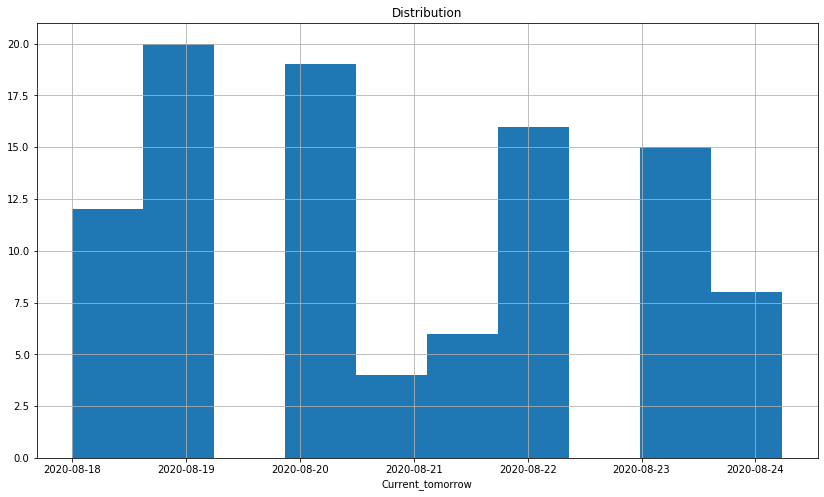

In [57]:
plt.rcParams['figure.figsize']=[14,8]
df_pd.current_tomorrow.hist()
plt.title("Distribution")
plt.xlabel("Current_tomorrow")
plt.show()

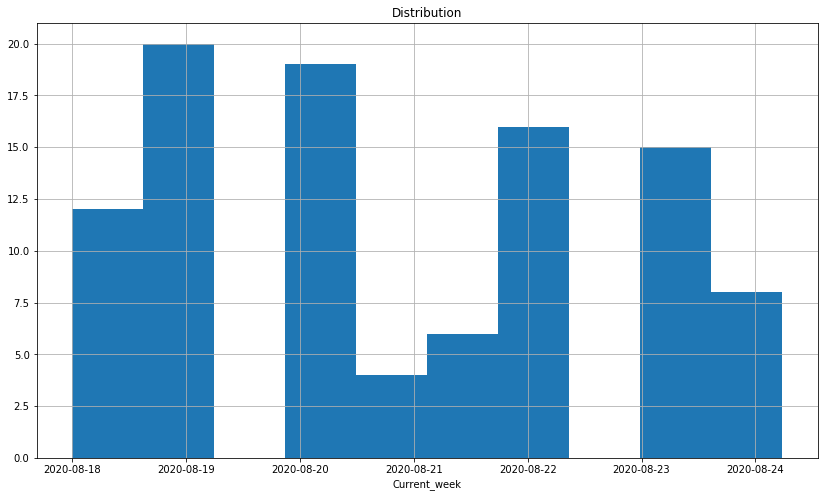

In [58]:
df_pd.current_week.hist()
plt.title("Distribution")
plt.xlabel("Current_week")
plt.show()

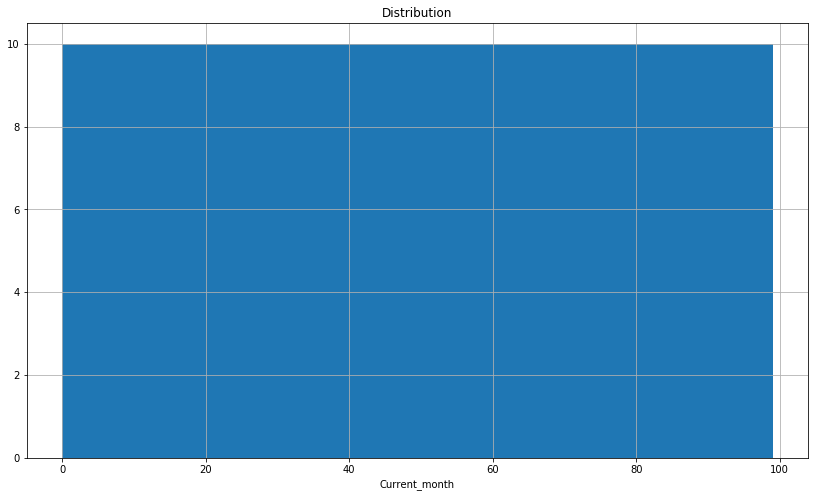

In [59]:
df_pd.current_month.hist()
plt.title("Distribution")
plt.xlabel("Current_month")
plt.show()

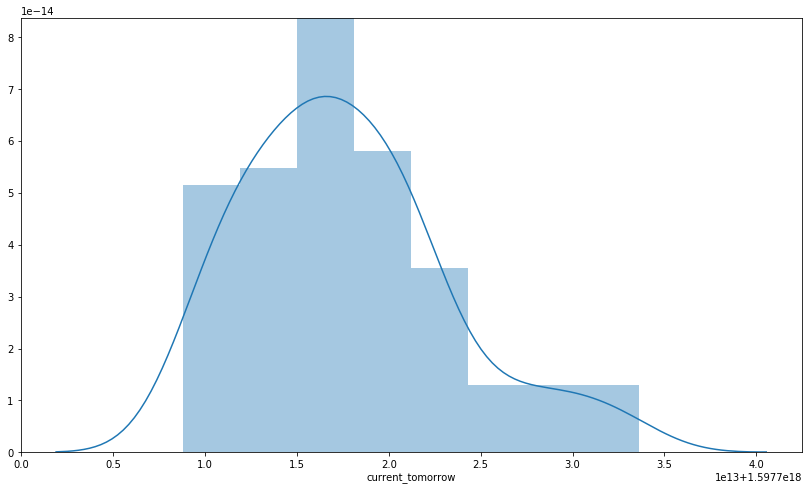

In [72]:
columns = ["current_tomorrow", "current_week", "current_month"]

sns.distplot(df_pd[columns[0]])


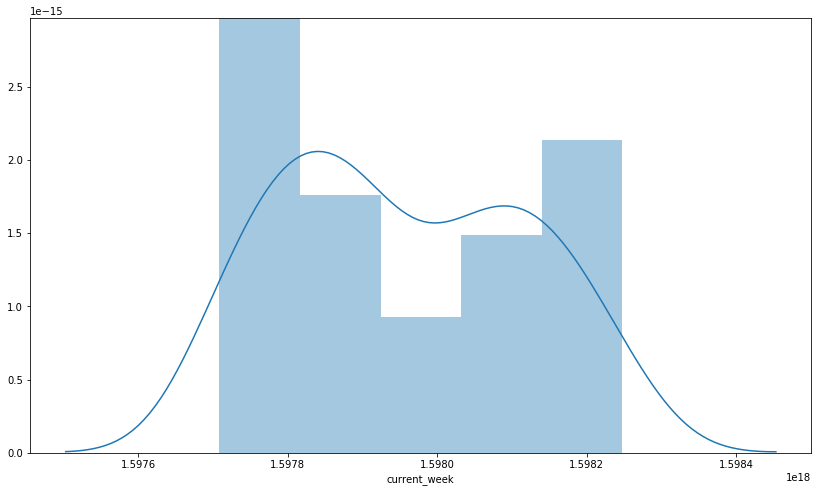

In [73]:

sns.distplot(df_pd[columns[1]])


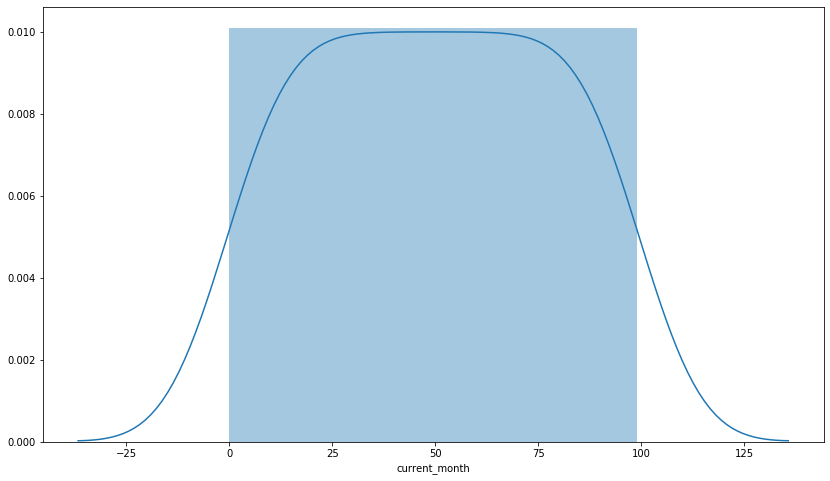

In [74]:

sns.distplot(df_pd[columns[2]])